# Malware Detection Binary Classification

## 필요 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [4]:
tf.__version__

'2.13.0'

## 데이터 로드

In [8]:
df = pd.read_csv('./malware.csv')

In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         10000 non-null  object 
 1   md5                          10000 non-null  object 
 2   Machine                      10000 non-null  int64  
 3   SizeOfOptionalHeader         10000 non-null  int64  
 4   Characteristics              10000 non-null  int64  
 5   MajorLinkerVersion           10000 non-null  int64  
 6   MinorLinkerVersion           10000 non-null  int64  
 7   SizeOfCode                   10000 non-null  int64  
 8   SizeOfInitializedData        10000 non-null  int64  
 9   SizeOfUninitializedData      10000 non-null  int64  
 10  AddressOfEntryPoint          10000 non-null  int64  
 11  BaseOfCode                   10000 non-null  int64  
 12  BaseOfData                   10000 non-null  int64  
 13  ImageBase        

In [11]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,VirusShare_3ede9b62781398a2e39a0f6af9356a54,3ede9b62781398a2e39a0f6af9356a54,332,224,258,10,0,117760,392192,0,...,5,3.425849,2.458492,4.035538,3146.400000,48,9640,72,15,0
1,fxsocm.dll,9a0959a682d8eba06d0bd181c49ee2a8,332,224,8462,7,10,112640,29696,0,...,8,3.911994,2.669737,5.335373,1222.750000,164,4889,72,16,1
2,VirusShare_abe7101746242c922a539ba461db4e38,abe7101746242c922a539ba461db4e38,332,224,258,10,0,119808,385024,0,...,6,3.776760,2.458492,5.317552,2740.166667,48,9640,72,15,0
3,VirusShare_64a1247fc96d5bc2994ef89ca09adee8,64a1247fc96d5bc2994ef89ca09adee8,332,224,258,10,0,120320,385024,0,...,6,3.756068,2.458492,5.317552,2739.500000,48,9640,72,15,0
4,asferror.dll,ebc23440aa9cc4f08241d35147c1d5b5,332,224,8462,7,10,0,7168,0,...,2,3.488703,3.471506,3.505901,3050.000000,888,5212,0,16,1


## EDA

In [13]:
df.isna().sum().sum()

0

In [19]:
for column in df.select_dtypes(include='object').columns:
    print(f'{column} - {df[column].value_counts().sort_values(ascending=False)}')
    print('-' * 30)

Name - Name
ieui.dll                                       15
iertutil.dll                                   14
secur32.dll                                    14
jsdbgui.dll                                    13
mshtml.dll                                     13
                                               ..
VirusShare_e543a26bf84ebd7fc9881f36ed7b2bd2     1
VirusShare_ba7112c1c28c79962b4b1a972df56535     1
VirusShare_f6205ec0bdea920e4c2d6ef3a83bda96     1
VirusShare_d195437612243d3528041d33f0799f2f     1
VirusShare_dbffdb769f89325d0b0036b92ff55179     1
Name: count, Length: 9016, dtype: int64
------------------------------
md5 - md5
3ede9b62781398a2e39a0f6af9356a54    1
fb78ca70bdfd2a1734fdf16f9837fa11    1
8615799138619c6879b3789f747c5584    1
abe7101746242c922a539ba461db4e38    1
64a1247fc96d5bc2994ef89ca09adee8    1
                                   ..
ce8c73eccdc20a4138667f39307de512    1
ac2e405c5bd853dbfabcc7145529fbd1    1
eb5d72d017b36366b7bc6dc785e18eb7    1
8e8aff35dc7a371

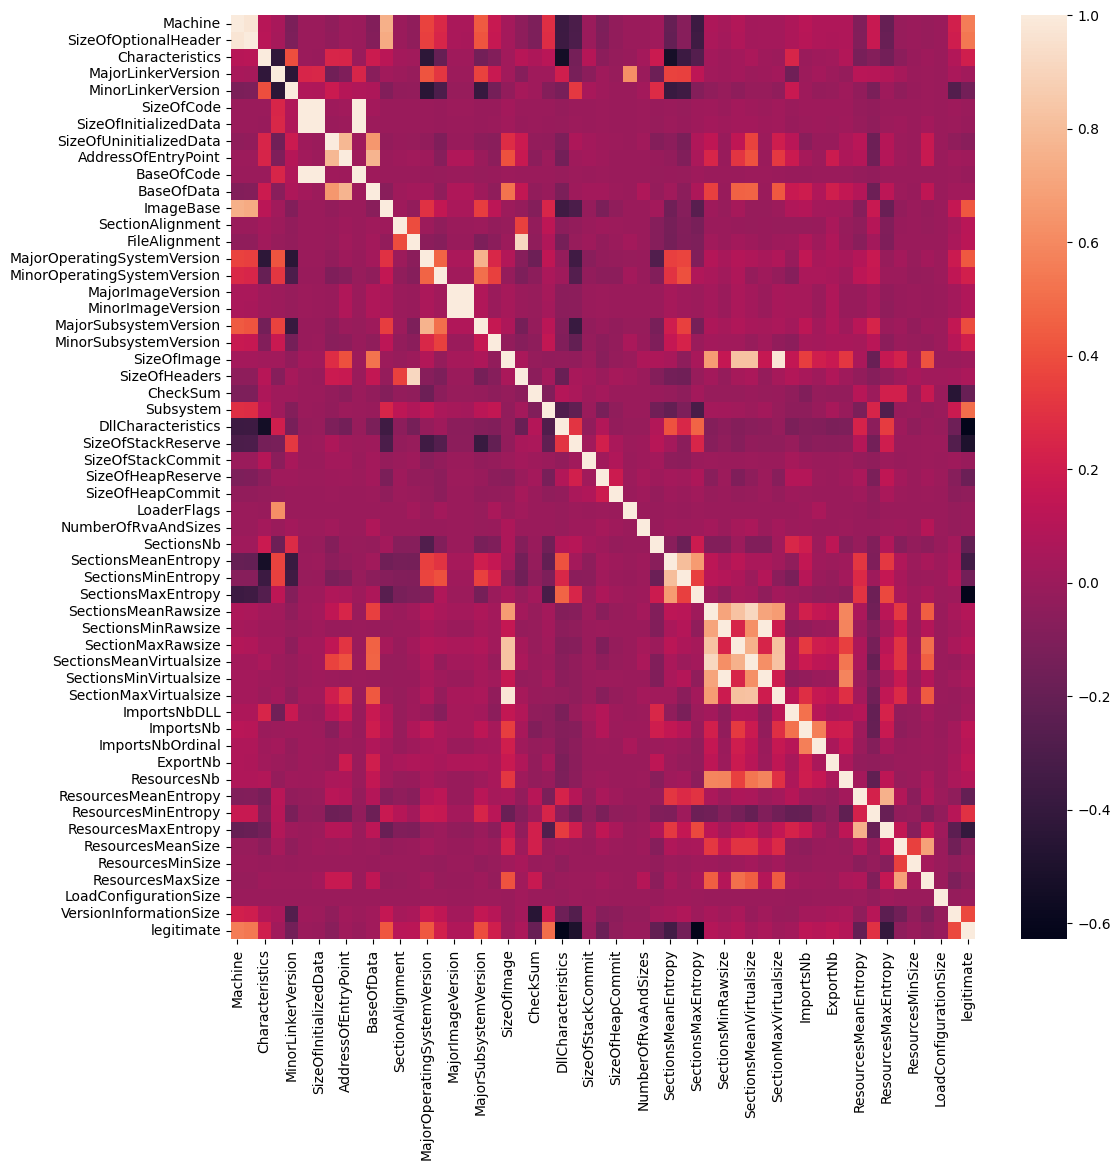

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [22]:
df.corr(numeric_only=True)['legitimate']

Machine                        0.557064
SizeOfOptionalHeader           0.539279
Characteristics                0.207261
MajorLinkerVersion             0.026127
MinorLinkerVersion            -0.149435
SizeOfCode                    -0.000022
SizeOfInitializedData         -0.008438
SizeOfUninitializedData       -0.065781
AddressOfEntryPoint            0.015283
BaseOfCode                    -0.007330
BaseOfData                     0.022595
ImageBase                      0.421823
SectionAlignment               0.114236
FileAlignment                  0.121895
MajorOperatingSystemVersion    0.428284
MinorOperatingSystemVersion    0.214121
MajorImageVersion              0.081986
MinorImageVersion              0.080964
MajorSubsystemVersion          0.389552
MinorSubsystemVersion          0.209799
SizeOfImage                    0.009153
SizeOfHeaders                  0.060066
CheckSum                      -0.195656
Subsystem                      0.497386
DllCharacteristics            -0.628745


In [26]:
df.shape

(10000, 57)

In [27]:
df['legitimate'].value_counts()

legitimate
0    7071
1    2929
Name: count, dtype: int64

In [29]:
df['legitimate'].value_counts(normalize=True)

legitimate
0    0.7071
1    0.2929
Name: proportion, dtype: float64

## Feature Engineering 및 데이터 전처리

In [30]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [32]:
x_features = ['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 
              'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 
              'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
              'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 
              'MinorSubsystemVersion', 'SizeOfImage','SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
              'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 
              'NumberOfRvaAndSizes', 'SectionsNb', 'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy', 
              'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize', 'SectionsMeanVirtualsize', 
              'SectionsMinVirtualsize', 'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb', 'ImportsNbOrdinal', 
              'ExportNb', 'ResourcesNb', 'ResourcesMeanEntropy', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 
              'ResourcesMeanSize', 'ResourcesMinSize', 'ResourcesMaxSize', 'LoadConfigurationSize', 'VersionInformationSize' ]
y_feature = 'legitimate'

In [33]:
X = df[x_features]
Y = df[y_feature]

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 데이터 분할

In [35]:
print([x.shape for x in [X, Y]])

[(10000, 54), (10000,)]


In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=1234, stratify=Y)

In [37]:
print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(7000, 54), (3000, 54), (7000,), (3000,)]


## 모델링

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_shape=(54,), units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1760      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 모델 학습

In [44]:
history = model.fit(xtrain, ytrain, batch_size=32, epochs=20, validation_data=(xtest, ytest))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2050 - accuracy: 0.9383 - val_loss: 0.0655 - val_accuracy: 0.9810
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9789 - val_loss: 0.0482 - val_accuracy: 0.9850
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9837 - val_loss: 0.0434 - val_accuracy: 0.9863
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9850 - val_loss: 0.0423 - val_accuracy: 0.9863
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9861 - val_loss: 0.0377 - val_accuracy: 0.9873
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9880 - val_loss: 0.0399 - val_accuracy: 0.9870
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9876 - val_loss: 0.0365 - val_accuracy: 0.9883
Epoch 

## 모델 평가

In [55]:
for key in history.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


In [46]:
loss, accuracy = model.evaluate(xtest, ytest)

94/94 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9880


In [48]:
print(f'Loss= {loss:,.4f}, Accuracy= {accuracy:,.4f}')

Loss= 0.0421, Accuracy= 0.9880


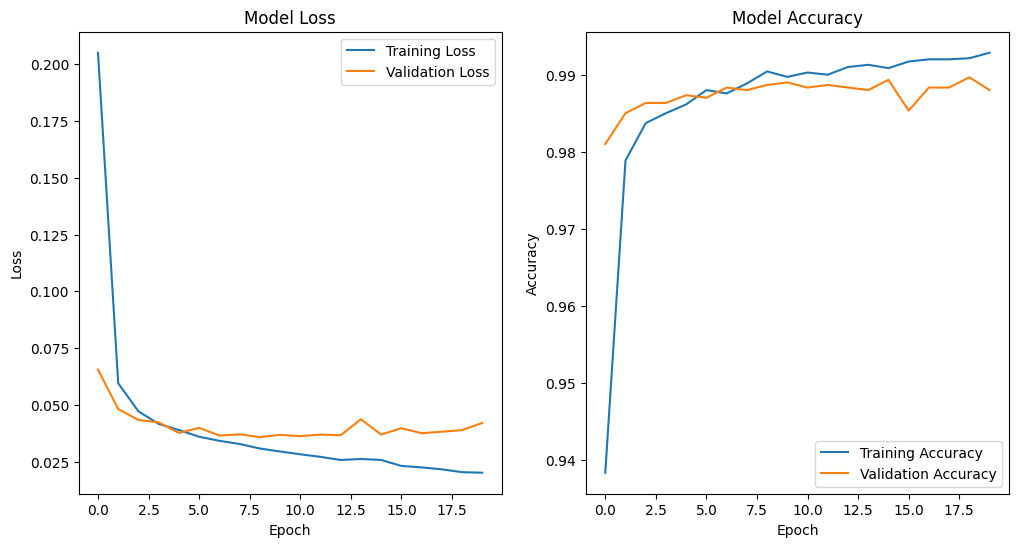

In [59]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.show()

## 모델을 통한 예측

In [62]:
ypred = model.predict(xtest) > 0.5

94/94 [==============================] - 0s 1ms/step


In [75]:
confusion_matrix(ytest, ypred)

array([[2111,   10],
       [  26,  853]], dtype=int64)

In [76]:
print(f'Accuracy  Score= {accuracy_score(ytest, ypred):,.4f}')
print(f'Precision Score= {precision_score(ytest, ypred):,.4f}')
print(f'Recall    Score= {recall_score(ytest, ypred):,.4f}')
print(f'F1        Score= {f1_score(ytest, ypred):,.4f}')

Accuracy  Score= 0.9880
Precision Score= 0.9884
Recall    Score= 0.9704
F1        Score= 0.9793


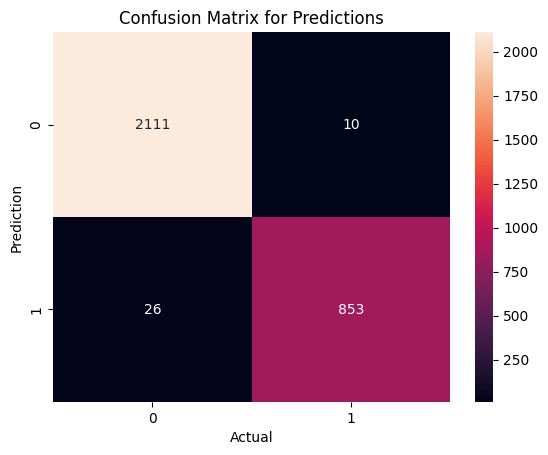

In [77]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d')
plt.title('Confusion Matrix for Predictions')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

# 실습. 통신회사의 고객 이탈 여부 - Logicstic Regression

- 독립변수 : tenure(가입기간), age (연령), income(수입)
- 종속변수 : churn (이탈여부)

## 필요 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.13.0'

## 데이터 로드

In [6]:
df = pd.read_csv('./ChurnData.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [8]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## EDA, Feature Engineering 및 데이터 전처리

In [9]:
df.isna().sum().sum()

0

In [10]:
x_features = ['tenure', 'age', 'income']
y_feature = 'churn'

In [11]:
X = df[x_features]
Y = df[y_feature]

In [12]:
print([x.shape for x in [X, Y]])

[(200, 3), (200,)]


In [13]:
dfXY = pd.concat([X, Y], axis=1)

In [14]:
dfXY.corr()['churn']

tenure   -0.376860
age      -0.287697
income   -0.090790
churn     1.000000
Name: churn, dtype: float64

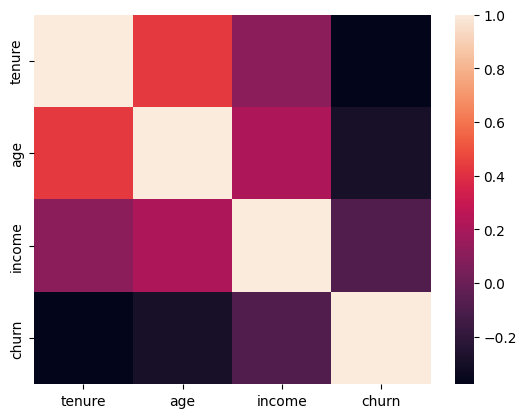

In [15]:
sns.heatmap(dfXY.corr())
plt.show()

## 방법1 - statsmodels Logit

In [16]:
tempdf = df[['tenure', 'age', 'income', 'churn']]

In [22]:
train_size = int(len(tempdf) * 0.7)
train_data = tempdf.iloc[:train_size, ]
test_data = tempdf.iloc[train_size: ,]
y_true = test_data['churn']
x_test = test_data.drop(columns=['churn'])

In [23]:
print([x.shape for x in [tempdf, train_data, test_data, y_true, x_test]])

[(200, 4), (140, 4), (60, 4), (60,), (60, 3)]


In [24]:
model = ols(formula='churn ~ tenure + age + income', data=train_data).fit()

In [25]:
result = sm.stats.anova_lm(model, typ=3)

In [26]:
print(result)

              sum_sq     df          F        PR(>F)
Intercept   7.219076    1.0  40.293563  3.029643e-09
tenure      2.627100    1.0  14.663262  1.954111e-04
age         0.324081    1.0   1.808871  1.808823e-01
income      0.048683    1.0   0.271724  6.030256e-01
Residual   24.366036  136.0        NaN           NaN


In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     9.366
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           1.14e-05
Time:                        15:42:00   Log-Likelihood:                -76.260
No. Observations:                 140   AIC:                             160.5
Df Residuals:                     136   BIC:                             172.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7292      0.115      6.348      0.000       0.502       0.956
tenure        -0.0074      0.002     -3.829      0.000      -0.011      -0.004
age           -0.0040      0.003     -1.345      0.181      -0.010       0.002
income        -0.0001      0.000     -0.521      0.603      -0.001       0.000
==============================================================================
Omnibus:                       33.441   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.296
Skew:                           0.544   Prob(JB):                      0.00130
Kurtosis:                       1.954   Cond. No.                         535.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model.params

Intercept    0.729235
tenure      -0.007445
age         -0.004036
income      -0.000131
dtype: float64

In [31]:
y_pred = model.predict(x_test) > 0.5

In [34]:
print(f'Accuracy  Score= {accuracy_score(y_true, y_pred):,.4f}')
print(f'Precision Score= {precision_score(y_true, y_pred):,.4f}')
print(f'Recall    Score= {recall_score(y_true, y_pred):,.4f}')
print(f'F1        Score= {f1_score(y_true, y_pred):,.4f}')

Accuracy  Score= 0.7167
Precision Score= 0.4444
Recall    Score= 0.2500
F1        Score= 0.3200


In [53]:
model = logit(formula='churn ~ tenure + age + income', data=train_data).fit()

Optimization terminated successfully.
         Current function value: 0.513165
         Iterations 7


In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                  140
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                            3
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:                  0.1599
Time:                        15:58:44   Log-Likelihood:                -71.843
converged:                       True   LL-Null:                       -85.521
Covariance Type:            nonrobust   LLR p-value:                 4.958e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5677      0.687      2.283      0.022       0.222       2.914
tenure        -0.0439      0.012     -3.542      0.000      -0.068      -0.020
age           -0.0246      0.018     -1.334      0.182      -0.061       0.012
income        -0.0024      0.005     -0.528      0.597      -0.011       0.006
==============================================================================
"""

In [45]:
y_pred = model.predict(x_test) > 0.5

In [55]:
print(f'Accuracy  Score= {accuracy_score(y_true, y_pred):,.4f}')
print(f'Precision Score= {precision_score(y_true, y_pred):,.4f}')
print(f'Recall    Score= {recall_score(y_true, y_pred):,.4f}')
print(f'F1        Score= {f1_score(y_true, y_pred):,.4f}')

Accuracy  Score= 0.7333
Precision Score= 0.5000
Recall    Score= 0.3125
F1        Score= 0.3846


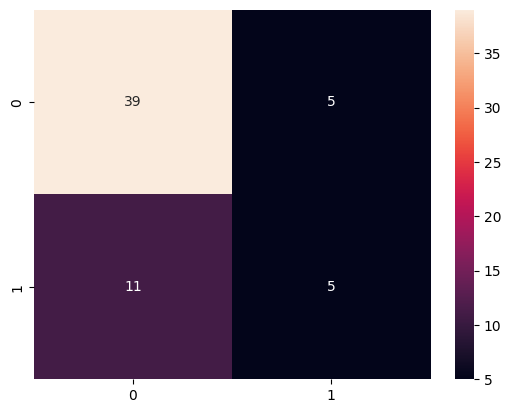

In [56]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

## 방법2 - scikit-learn LogisticRegression

In [69]:
X = StandardScaler().fit_transform(X)

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=123, stratify=Y)

In [80]:
print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(140, 3), (60, 3), (140,), (60,)]


In [81]:
model = LogisticRegression(max_iter=200, random_state=123).fit(xtrain, ytrain)

In [82]:
model.coef_, model.intercept_

(array([[-0.85213478, -0.42471116, -0.03154867]]), array([-1.12813437]))

In [83]:
print(f'Training   Score= {model.score(xtrain, ytrain):,.4f}')
print(f'Validation Score= {model.score(xtest, ytest):,.4f}')

Training   Score= 0.7429
Validation Score= 0.6667


In [84]:
ypred = model.predict(xtest)

In [85]:
print(f'Accuracy  Score= {accuracy_score(ytest, ypred):,.4f}')
print(f'Precision Score= {precision_score(ytest, ypred):,.4f}')
print(f'Recall    Score= {recall_score(ytest, ypred):,.4f}')
print(f'F1        Score= {f1_score(ytest, ypred):,.4f}')

Accuracy  Score= 0.6667
Precision Score= 0.3636
Recall    Score= 0.2353
F1        Score= 0.2857


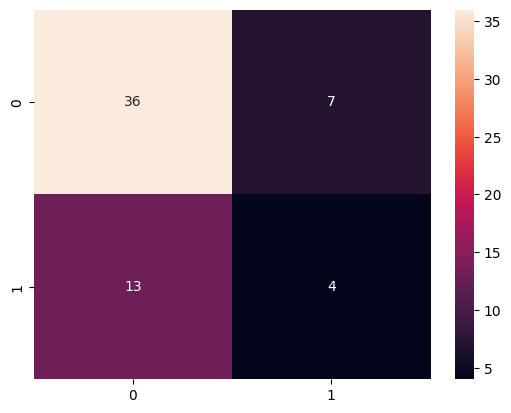

In [86]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True)
plt.show()

## 방법3 - Tensorflow

In [87]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=123, stratify=Y)

In [88]:
print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(140, 3), (60, 3), (140,), (60,)]


In [89]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_shape=(3,), units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [90]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673 (2.63 KB)
Trainable params: 673 (2.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
history = model.fit(xtrain, ytrain, batch_size=32, epochs=50, validation_data=(xtest, ytest))

Epoch 1/50
5/5 [==============================] - 1s 54ms/step - loss: 0.6906 - accuracy: 0.6286 - val_loss: 0.6649 - val_accuracy: 0.6833
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 0.6756 - accuracy: 0.6786 - val_loss: 0.6523 - val_accuracy: 0.7000
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6618 - accuracy: 0.7000 - val_loss: 0.6407 - val_accuracy: 0.7167
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6500 - accuracy: 0.7071 - val_loss: 0.6295 - val_accuracy: 0.7167
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6384 - accuracy: 0.7071 - val_loss: 0.6192 - val_accuracy: 0.7167
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6275 - accuracy: 0.7071 - val_loss: 0.6096 - val_accuracy: 0.7167
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6177 - accuracy: 0.7071 - val_loss: 0.6004 - val_accuracy: 0.7167
Epoch 8/50
5/5 [===========

In [93]:
loss, accuracy = model.evaluate(xtest, ytest, verbose=2)

2/2 - 0s - loss: 0.5129 - accuracy: 0.7167 - 49ms/epoch - 24ms/step


In [94]:
print(f'Loss    = {loss:,.4f}')
print(f'Accuracy= {accuracy:,.4f}')

Loss    = 0.5129
Accuracy= 0.7167


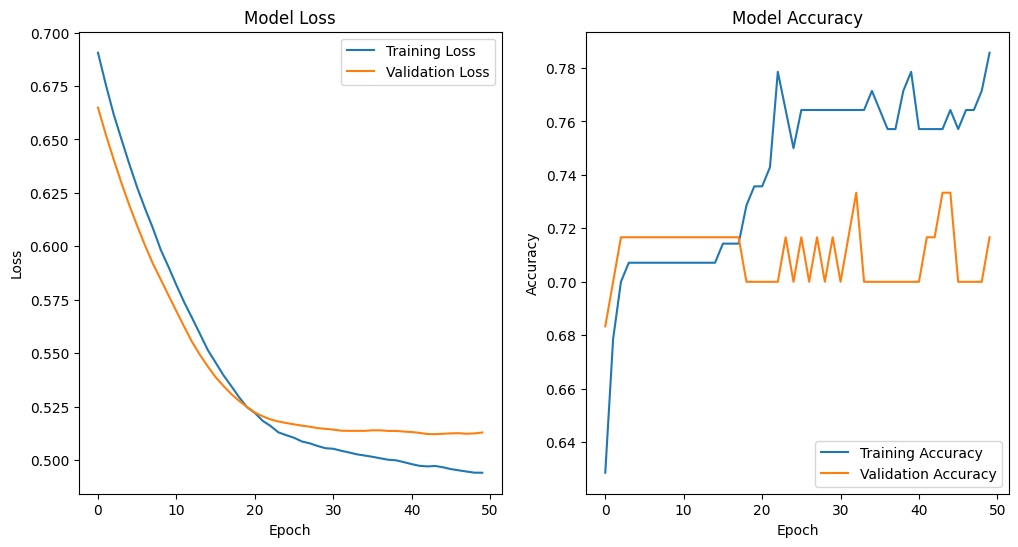

In [96]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.show()

In [99]:
ypred = model.predict(xtest) > 0.5

2/2 [==============================] - 0s 5ms/step


In [102]:
print(f'Accuracy  Score= {accuracy_score(ytest, ypred):,.4f}')
print(f'Precision Score= {precision_score(ytest, ypred):,.4f}')
print(f'Recall    Score= {recall_score(ytest, ypred):,.4f}')
print(f'F1        Score= {f1_score(ytest, ypred):,.4f}')

Accuracy  Score= 0.7167
Precision Score= 0.5000
Recall    Score= 0.3529
F1        Score= 0.4138


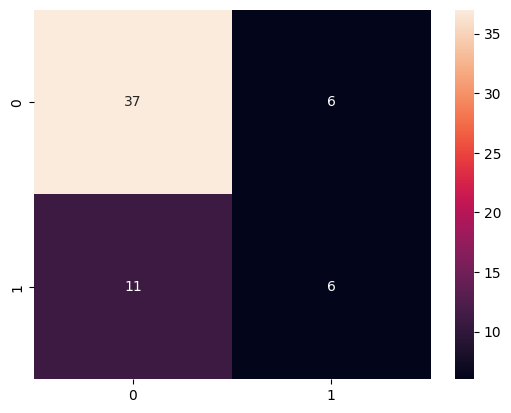

In [103]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True)
plt.show()